# Advanced Statistical Modelling and Data Analysis

## Intro to statistical modelling

### dr hab. inż. Jerzy Baranowski, Prof. AGH

In [1]:
import scipy.stats as stats
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd


import matplotlib as mpl
plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200


light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#f0dc05"
dark="#EECA02"
dark_highlight="#BB9700"
green="#00FF00"
light_grey="#DDDDDD"

## Organizational aspects
- C3 214, 
- jb@agh.edu.pl
- Course materials, including lecture slides are available on [Github](https://github.com/KAIR-ISZ/public_lectures/), if you see something wrong - create an issue.

## Course outline

### Lectures
- General introduction to statistical modelling
- Markov Chain Monte Carlo 
- Alternative methods of Bayesian Computation 
- Bayesian workflow

### Course work
- Everyone will be assigned a paper on Bayesian methods
- We will do a directed reading of that paper (45 minutes)


## Source material - BDA 3rd edition
Andrew Gelman et. Al

<img src="img/bda_cover.png" width="200">

- Examples in R but easily transferable.
- Great lectures by Prof. Aki Vehtari from Alto University [link](https://aalto.cloud.panopto.eu/Panopto/Pages/Sessions/List.aspx#folderID=%22f0ec3a25-9e23-4935-873b-a9f401646812%22)

## Source material - Statistical Rethinking 2nd edition
Richard McElreath

<img src="img/statistical-rethinking.jpg" width="200">

- Probably the best source for self learning of Bayesian methods
- More code oriented, also in R, lots of additional resources, including Youtube lectures available [here](https://xcelab.net/rm/statistical-rethinking/)

## Source material - case studies by Michael Betancourt

- Available [here](https://betanalpha.github.io/writing/)
- More advanced, but at the same time cutting edge
- Some content (most recent and podcasts) is available only for patrons

## Extra reading - Student's guide to Bayesian statistics

Ben Lambert

<img src="img/students_guide.jpg" width="200">

Second "modern" book on Bayesian statistics

## Extra reading - Bayesian analysis with Python
Osvaldo Martin

<img src="img/pmc3book.png" width="200">

Actually only book based on Python, with focus on PyMC3. You need to know what you are doing. Risky choice for first contact.

## Interesting people on Twitter

- Prof Aki Vehtari [@avehtari](https://twitter.com/avehtari)
- Prof. Andrew Gelman [@StatModeling](https://twitter.com/StatModeling) - also has an interesting blog
- Michael Betancourt [@betanalpha](https://twitter.com/betanalpha)
- Richard McElreath [@rlmcelreath](https://twitter.com/rlmcelreath)
- Alex Andorra [@alex_andorra](https://twitter.com/alex_andorra) - podcast on Bayesian statisticsa


## What is the point?
- We are focusing on Bayesian Data Analysis and statistical modelling
- Models grounded in probability
- As interpretable as possible
- Maximally transparent

## What is data science?
<img src="img/tierney.png" width="500">

Work of data scientist intertwines both machine learning and statistical modelling and multiple other fields


## SM vs ML
- Statistical modelling and machine learning are closely related fields, often hard to distinguish
- They should not be directly compared because those comparisons are usually unfair to one or another, as they are for different problems

## SM
- Incorporates probability
- Considers data generation
- Looks for interpretability
- Usually regression based
- Not limited to linear

## ML
- No initial structure nor traditional parameters
- No focus on single variable
- Does not model the process but learns from data
- Does not rely on additivity

## Advantages of ML
- ML is the best in high Signal/Noise ratios
- Especially visual and sound recognition, language translation
- More of a black box approach
- Large datasets with multiple number of features

## Advantages of SM
- Handles small datasets better
- Provides uncertainty estimates
- Transparent
- Allows investigation of influence of predictors
- Only way to obtain real interpretability

## Discussion points
- ML might need more data for the same problem as SM
- SM needs interactions to be specified, while ML can determine them more freely
- ML usually is a better classifier/predictor but uncertanity is not handled that well
- ML has much more vocal advocates
- SM requires data reduction for larger datasets

## When to use SM?
- Uncertainty is important or Signal/Noise ratio is small
- Not perfect training data
- Isolation of particular variables effects
- Additivity 
- Smaller samples
- Interpretability

## When to use ML?
- Signal/noise ratio is large and little randomness
- Relatively unlimited training data
- Overall prediction is important
- Uncertanity is not
- Expected substantial nonlinearity
- Huge samples
- Black box is acceptable

## Bayesian Statistical Modelling
- Three essential steps:
- Set up full probability model
- Condition on the observed data
- Check and evaluate model and its posterior distribution (repeat if necessary)

## Bayesian paradigm
- Bayesian statistics differs in two main points with frequentist statistics:
- Data is fixed, parameters are uncertain
- Prior knowledge is inconporated in inference
- Everything has a probability distribution

## Bayesian methods work
Sharon Bertsch McGrayne

<img src="img/theory.jpg" width="200">


Available e.g. on Audible (1st month free)
History of use of Bayesian statistics

## Main fields of Bayesian applications
- Social sciences
- Medicine and biology
- Experimental sciences
- Diagnositics 
- Decision support

## Main concepts of BDA
- Observables and unobservables
- Parameters $\theta$, data $y$ and predictions $\hat{y}$
- Observational units and variables
- Exchangeability
- Explanatory variables (predictors)
- Hierarchical modelling
- Utility distributions

![](img/quote.png)

## Bayes’ rule derivation

It all starts with joint probability

$$p(\theta,y)=p(\theta)p(y|\theta)$$

With relatively basic transformations

$$ p(\theta|y)=\frac{p(\theta,y)}{p(y)}=\frac{p(\theta)p(y|\theta)}{p(y)}$$

where 

$$p(y)=\sum_\theta p(\theta)p(y|\theta)$$

## Bayes' rule
In most applicatations we focus on the numerator

$$ \underbrace{p(\theta|y)}_{\mathrm{posterior}}\propto 
\underbrace{p(\theta)}_{\mathrm{prior}}
\underbrace{p(y|\theta)}_{\mathrm{likelihood}}$$



## Predictions

### Prior predictive distribution

What values of data can we expect before actual measurements (based on prior knowledge)

$$
p(y)=\int p(y,\theta) d\theta=\int p(\theta)p(y|\theta)d\theta
$$

## Predictions

### Posterior predictive distribution

What values of new data can we expect based on previous measurements and prior knowledge

$$
p(\tilde{y}|y)=\int p(\tilde{y},\theta|y) d\theta=
\int p(\tilde{y}|\theta,y) p(\theta|y)d\theta=
\int p(\tilde{y}|\theta) p(\theta|y)d\theta
$$

## Additional notation and properties
### Everything is conditional
$$p(\theta,y|H)=p(\theta|H)p(y|\theta,H)$$

### Expectation
$$ \mathrm{E}(u)=\int up(u) d u $$

### Variance
$$ \mathrm{var}(u)=\int(u-\mathrm{E}(u))(u-\mathrm{E}(u))^T p(u) du$$

## Changing variables
$$ v=f(u) $$
### Discrete distributions
$$
p_v(v)=p_u(f^{-1}(v))
$$

## Continuous distributions
$$
p_v(v)=|J|p_u(f^{-1}(v))
$$

## Typical variable changes
It is useful to work on the unbounded interval i.e. $(-\infty,\infty)$. Often parameters are bounded, so we use transformations

- Logarithmic (from $(0,\infty)\rightarrow (-\infty,\infty)$)
$$ v=\log(u)$$
- Logistic (from $(0,1)\rightarrow (-\infty,\infty)$)
$$ v=\mathrm{logit}(u) $$
where 
$$ \mathrm{logit}(x)=\log\left(\frac{x}{1-x}\right),\quad
\mathrm{logit}^{-1}(y)=\frac{\exp(y)}{1+\exp(y)}$$

- Probit (from $(0,1)\rightarrow (-\infty,\infty)$)
$$ v=\Phi^{-1}(u) $$
where $\phi$ is the standard normal cumulative distribution function

## Single parameter models
### Building blocks of more complicated models
### Answers to basic questions e.g.:
- What is the average difference between treatment groups?
- How strong is the association between a treatment and an outcome?
- Does the effect of the treatment depend upon a covariate?
- How much variation is there among groups?

## Binomial model

- Natural model for data that arise from a sequence of $n$ exchangeable trials 
- Two possible outcomes, conventionally labeled ‘success’ and ‘failure.’
$$
p(y|\theta)=\mathrm{Bin}(y|n,\theta)={n \choose y}\theta^y (1-\theta)^{n-y}
$$


## Motivational example
- Mass Effect surface sampling using grid approximation


<img src="img/masseffect.png" alt="drawing" width="500"/> 

## Example of Bayesian learning
Globe probing:
- The true proportion of water covering the globe is p.
- A single toss of the globe has a probability $p$ of producing a water (W) observation.
- It has a probability $1 − p$ of producing a land (L) observation. 
- Each toss of the globe is independent of the others.

In [2]:

theta=np.linspace(0,1,200)


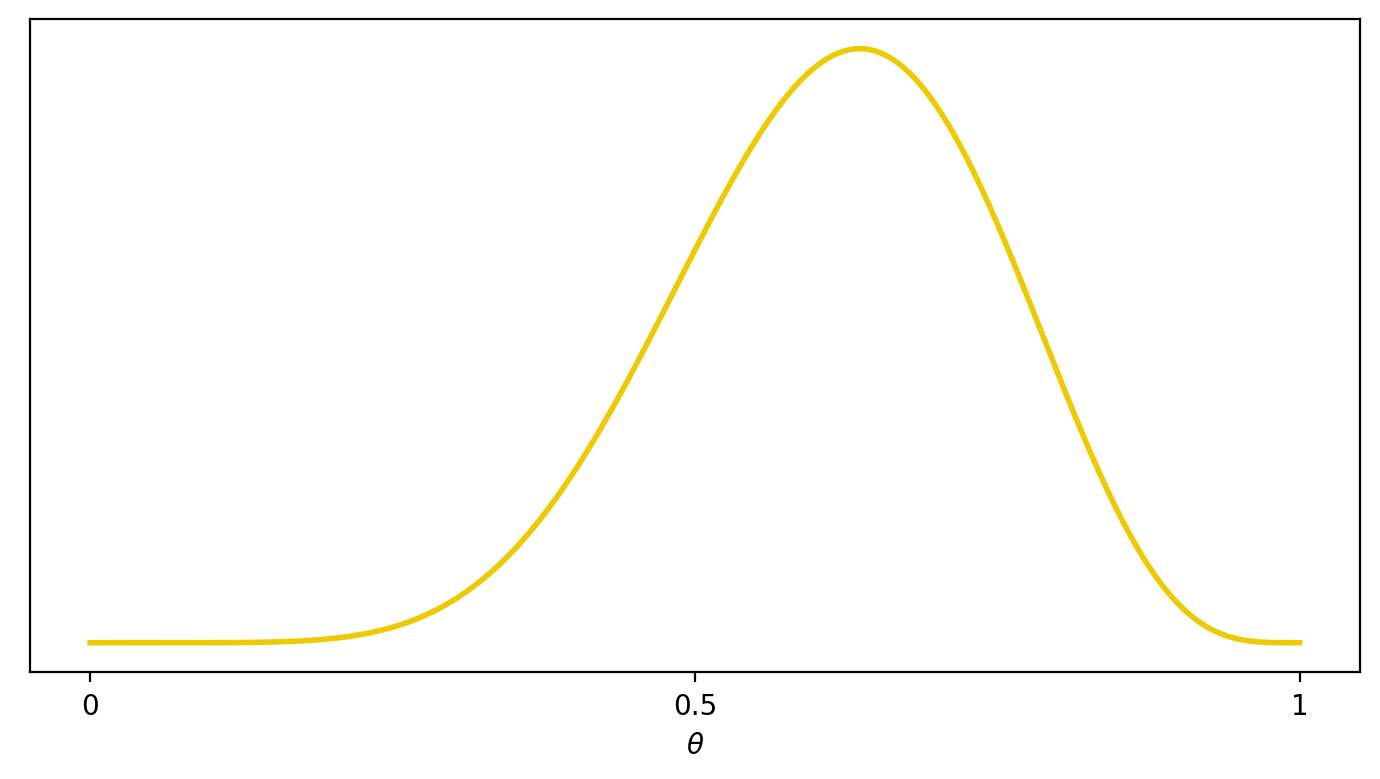

In [3]:
y=7
n=11

f0, ax = plt.subplots(figsize=(7,4),tight_layout=True)

likelihood = stats.binom.pmf(y, n, theta)
ax.plot(theta,likelihood,c=dark,linewidth=2)
ax.set_xlabel(r'$\theta$')
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])

ax.set_yticks([])
plt.show()

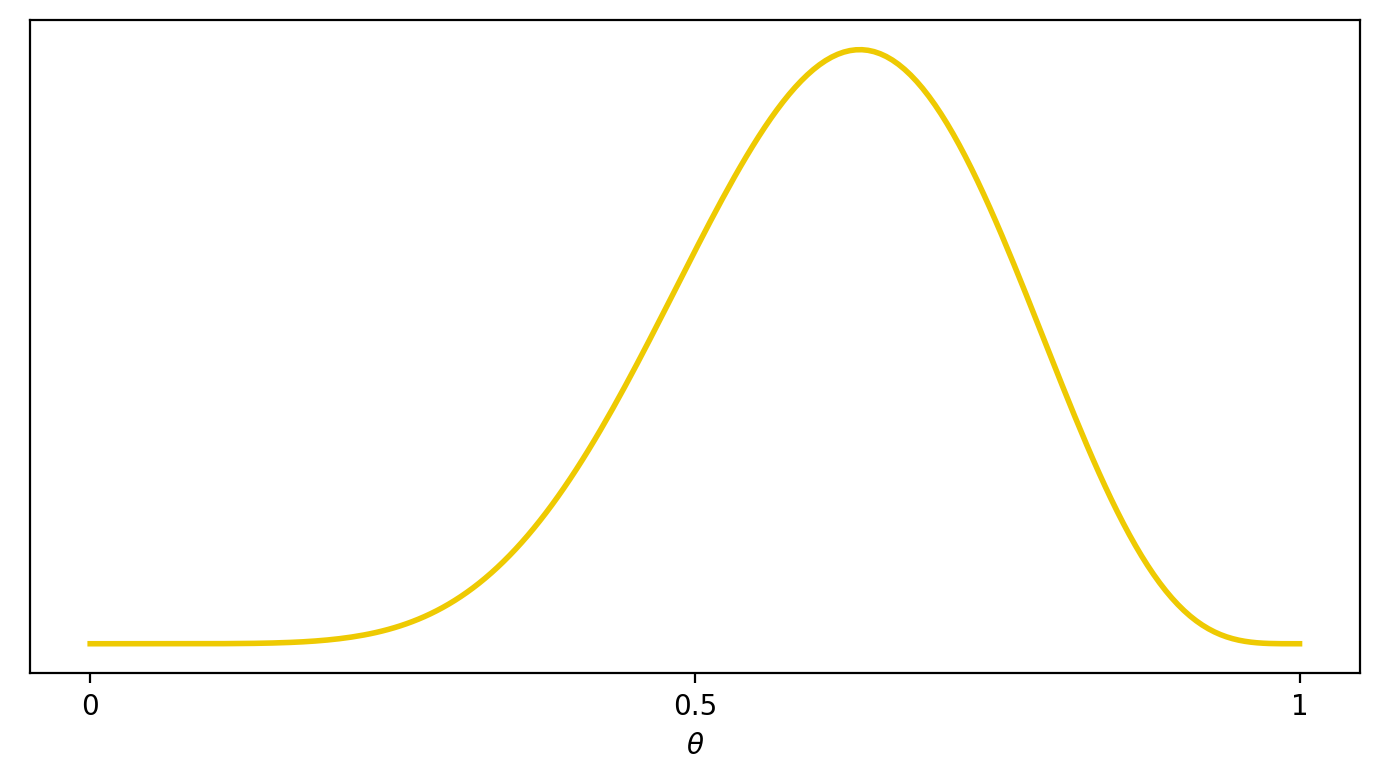

In [4]:
f0

## How does it look analytically?
Posterior distribution with uniform prior takes form
$$ p(\theta|y)\propto \theta^y (1-\theta)^{n-y}$$
Which has form of Beta distribution
$$ \theta|y\sim \mathrm{Beta} (y+1,n-y+1)$$

## How to summarize posterior?
*Ideally* – by itself

*Practically*

- Quantity of interest – mean, median, mode, generally compute an expectation of a function of considered variable
- Uncertainity – standard deviation, the interquartile range, and other quantiles

## Interval summaries
- Central interval - a symmetric interval around for example a mean
- Highest posterior density region - smallest interval containing the desired probability

<img src="img/intervals.png" width="500">


## Priors
- **population interpretation**, the prior distribution represents a population of possible parameter values, from which the $\theta$ of current interest has been drawn
- **state of knowledge interpretation**, we must express our knowledge (and uncertainty) about $\theta$ as if its value could be thought of as a random realization from the prior distribution

## Informative priors
- They try to introduce new information
- Often interpreted as knowledge from previous experiments
- For binomial example
$$ p(\theta)\propto \theta^{\alpha-1}(1-\theta)^{\beta-1}$$
It’s a Beta distribution $\theta \sim \mathrm{Beta}(\alpha, \beta)$, prior density is equivalent to $\alpha − 1$ prior successes and $\beta − 1$ prior failures.

## Posterior with informative prior
Posterior has a closed form
$$
\begin{aligned}
p(\theta|y)\propto{}& \theta^{y}(1-\theta)^{n-y}\theta^{\alpha-1}(1-\theta)^{\beta-1}=\\
={}&\theta^{y+\alpha-1}(1-\theta)^{n-y+\beta-1}=\\
={}&\mathrm{Beta}(\alpha+y,\beta+n-y)
\end{aligned}
$$
With expectation
$$
\mathrm{E}(\theta|y)=\frac{\alpha+y}{\alpha+\beta+n}
$$
which always lies between the sample proportion, $y/n$, and the prior mean, $\alpha/(\alpha + \beta)$

## Conjugacy
$$ p(\theta|y)\in\mathcal{P}\mathrm{for\ all}\ p(\cdot|\theta)\in\mathcal{F}\ \mathrm{and}\ p(\cdot)\in\mathcal{P}
$$

Class $\mathcal{P}$ is conjugate to class $\mathcal{F}$

- Conjugacy makes everything easier, formulas are analytic so computation is faster
- It should not be a goal by itself, as sometimes different distributions are much more justified

## Example - biology

Is proportion of girls born with placenta previa lower than the proportion of female births in general population i.e. 0.485?

Study results: of 980 births with PP 437 were female.
<img src="img/placenta.png" width="400">


## Uniform prior
Assuming uniform prior the analytic computation gives us posterior Beta(438,544). We can compute values analytically but its easier via sampling

In [5]:
samples=np.random.beta(438,544,10000)
interval=az.hdi(samples,0.94) 

print('94% HPD interval:'+str(interval))
print('Median:'+str(np.median(samples)))

94% HPD interval:[0.41508354 0.474795  ]
Median:0.445618329009168


### Visualisation

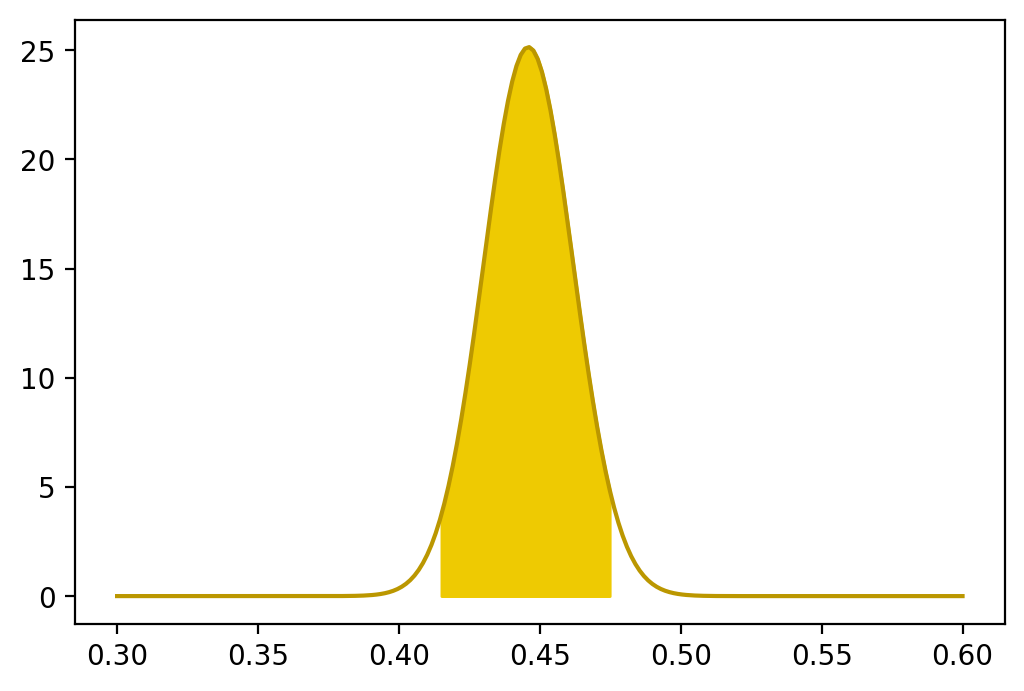

In [6]:

theta1=np.linspace(0.3,0.6,200)
theta2=np.linspace(interval[0],interval[1],200)
bd=stats.beta.pdf(theta1,438,544)
bd2=stats.beta.pdf(theta2,438,544)

fig, ax = plt.subplots()
ax.plot(theta1,bd,c=dark_highlight)
ax.fill_between(theta2, bd2, color=dark)
plt.show()

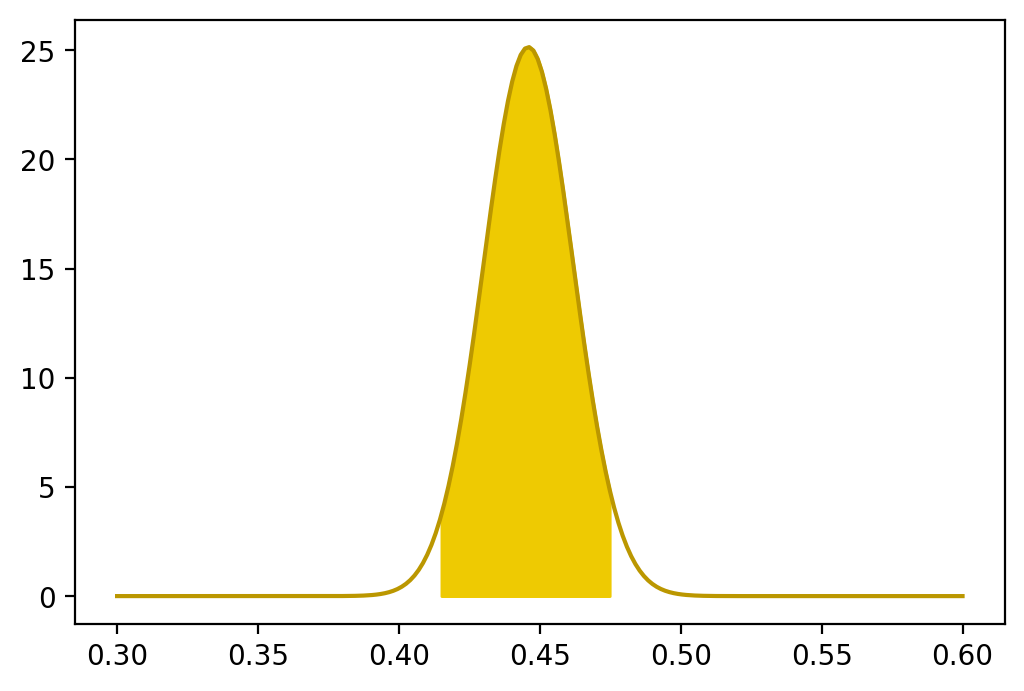

In [7]:
fig

## Conjugate priors

For binomial likelihood Beta is its conjugate. We can encode our knowledge (mean value of whole population) using the following relationships:

- mean of $\mathrm{Beta}(\alpha,\beta)$ distribution is $\frac{\alpha}{\alpha+\beta}$
- interpreting Beta, as previous binomial experiments then $\alpha+\beta$ is the population size
- we can try to do computation using various population sizes keeping mean of $0.485$

In [8]:
sizes=[2, 5, 10, 20, 100, 200, 1000]
post_median=[]
post_hpd=[]
alphas=[]
betas=[]
for n in sizes:
    alpha=0.485*n
    beta=n-alpha
    alphas.append(alpha)
    betas.append(beta)
    post_samples=np.random.beta(438+alpha,544+beta,1000)
    post_median.append(np.median(post_samples))
    post_hpd.append(az.hdi(post_samples,0.94))


In [9]:
df=pd.DataFrame({'Population size':sizes,
                 'Posterior median':post_median,
                 'Posterior 94% credible interval':post_hpd})

In [10]:
df

,Population size,Posterior median,Posterior 94% credible interval
0,2,0.446095,"[0.4170154115737223, 0.47461615143616886]"
1,5,0.445775,"[0.4181153897753631, 0.4753299285262975]"
2,10,0.446584,"[0.4166333214246837, 0.4747538471333696]"
3,20,0.447440,"[0.4196272308491388, 0.4779830882164423]"
4,100,0.448731,"[0.42092959423801, 0.47540520485326576]"
5,200,0.452784,"[0.4256463554418679, 0.4801202171526495]"
6,1000,0.465851,"[0.4448409047313637, 0.4881861464399556]"


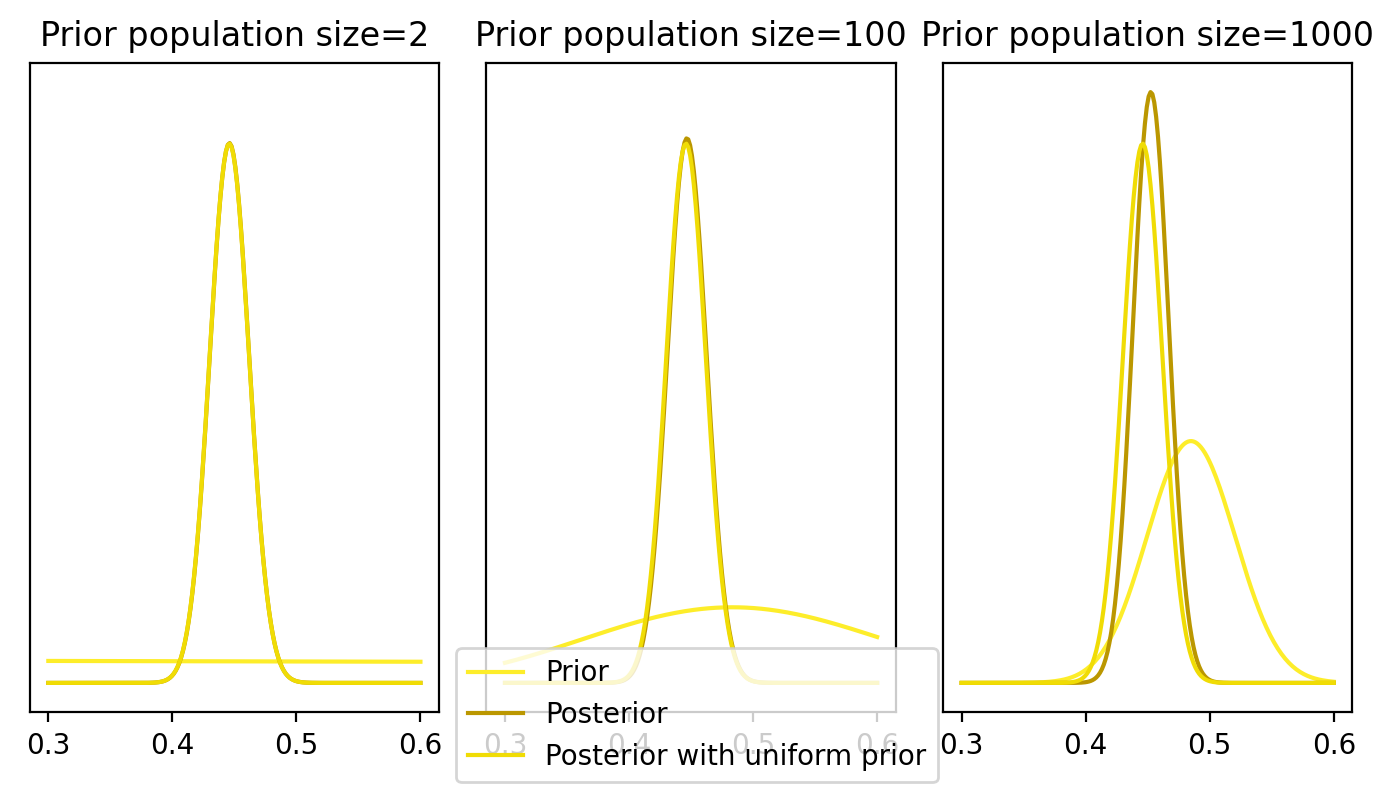

In [11]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize=(7,4),tight_layout=True)
ax1.plot(theta1,stats.beta.pdf(theta1,alphas[0],betas[0]),c=mid)
ax1.plot(theta1, stats.beta.pdf(theta1,438+alphas[0],544+betas[0]),c=dark_highlight)
ax1.plot(theta1, stats.beta.pdf(theta1,438,544),c=mid_highlight)
ax1.set_title('Prior population size='+str(sizes[0]))
ax1.set_yticks([])
ax2.plot(theta1,stats.beta.pdf(theta1,alphas[3],betas[3]),c=mid)
ax2.plot(theta1, stats.beta.pdf(theta1,438+alphas[3],544+betas[3]),c=dark_highlight)
ax2.plot(theta1, stats.beta.pdf(theta1,438,544),c=mid_highlight)
ax2.set_title('Prior population size='+str(sizes[4]))
ax2.set_yticks([])
ax3.plot(theta1,stats.beta.pdf(theta1,alphas[5],betas[5]),c=mid)
ax3.plot(theta1, stats.beta.pdf(theta1,438+alphas[5],544+betas[5]),c=dark_highlight)
ax3.plot(theta1, stats.beta.pdf(theta1,438,544),c=mid_highlight)
ax3.set_title('Prior population size='+str(sizes[6]))
ax3.set_yticks([])
f.legend(['Prior','Posterior','Posterior with uniform prior'],loc=8)


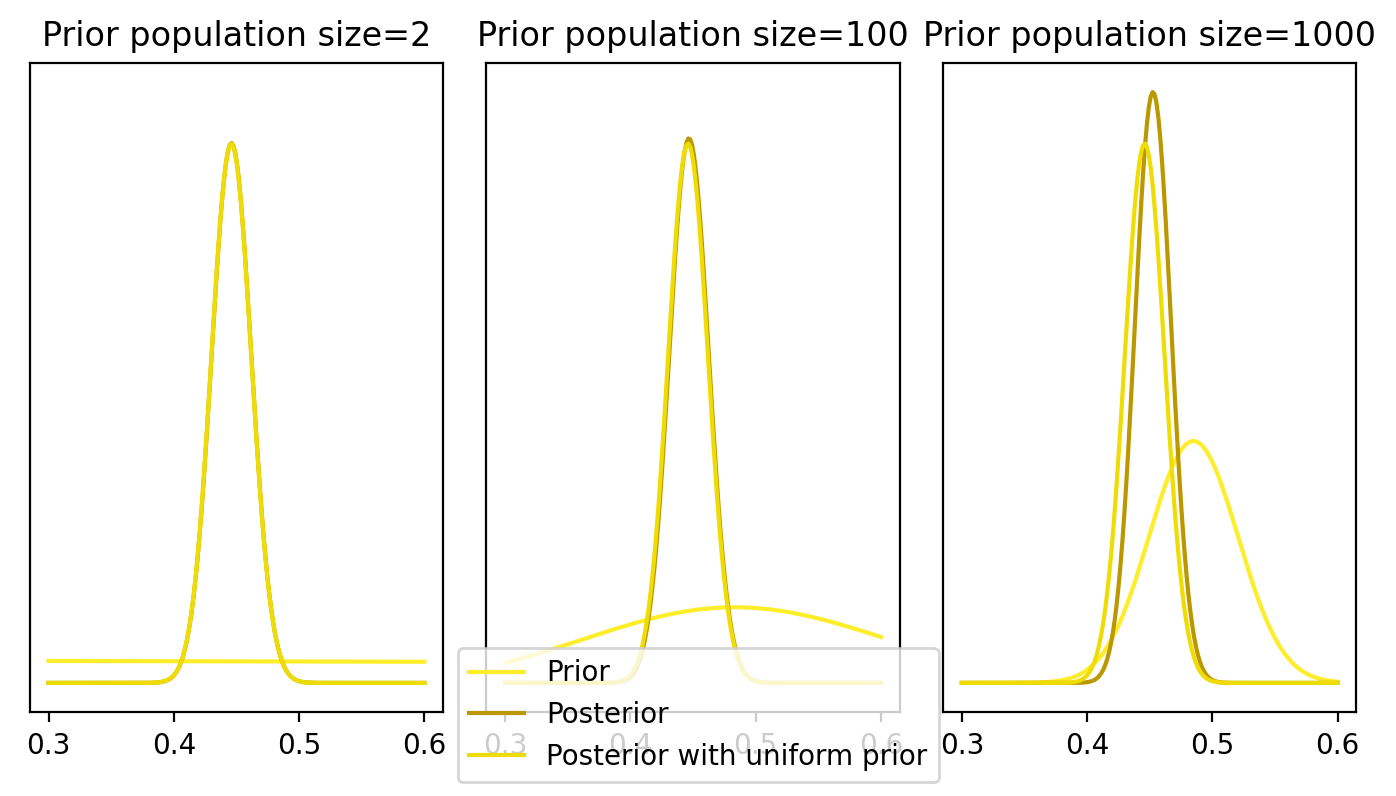

In [12]:
f

## Managing expectations

- Main point of probabilistic compoutation is to compute an expectation of certain function of parameters. 

- It generally covers all kind of statistics

- Has many beneficial properties

## Expectations

In general case, function of parameter $q\in Q$: $f(q)$  with respect to a probability distribution (mass function) $\pi(q)$ has expectation given by

$$
\mathbb{E}_{\pi}[f] = \int_{Q} \mathrm{d} q \, \pi(q) \, f(q).
$$

or in discrete case

$$
\mathbb{E}_{\pi}[f] = \sum_{q \in Q} \pi(q) \, f(q).
$$

## How to compute expectations?

Analytic integration is practically impossible. 

We are left with quadratures, for ex. Euler
$$
\mathbb{E}_{\pi}[f] \approx 
\sum_{n = 1}^{N} (\Delta q)_{n} \, \pi(q_{n}) \, f(q_{n}).
$$


## How to compute expectations?

Other option is exact sampling, leading to so called Monte Carlo estimators.

If we can generate set of samples $\{ q_{1}, \ldots, q_{N} \} \in Q$, such that

$$\hat{f}_{N}^{\text{MC}} = \frac{1}{N} \sum_{n = 1}^{N} f(q_{n}),$$

asymptotically converges

$$
\lim_{N \rightarrow \infty} \hat{f}_{N}^{\text{MC}} = \mathbb{E}_{\pi}[f].
$$

Then we have an exact sampling procedure


## Monte Carlo estimators

Provided, that samples are generated properly we can quantify estimator error

$$
\frac{ \hat{f}_{N}^{\text{MC}} - \mathbb{E}_{\pi}[f] }
{\text{MC-SE}_{N}[f] } 
\sim \mathcal{N}(0, 1),
$$

With Monte Carlo Standard Error given by
$$
\text{MC-SE}_{N}[f] 
= \sqrt{ \frac{ \text{Var}_{\pi}[f]}{N} }.
$$

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; EA &amp; Bioware </div>


## Grid approximation
1. Define the grid. This means you decide how many points to use in estimating the posterior, and then you make a list of the parameter values on the grid.
2. Compute the value of the prior at each parameter value on the grid.
3. Compute the likelihood at each parameter value.
4. Compute the unstandardized posterior at each parameter value, by multiplying the prior by the likelihood.
5. Finally, standardize the posterior, by dividing each value by the sum of all values.

In [13]:
def posterior_grid_approx(grid_points=5, success=7, tosses=9):
    
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
   
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [14]:
posterior_grid_approx()

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([0.        , 0.00332349, 0.18906942, 0.80760709, 0.        ]))

## Grid approximation example

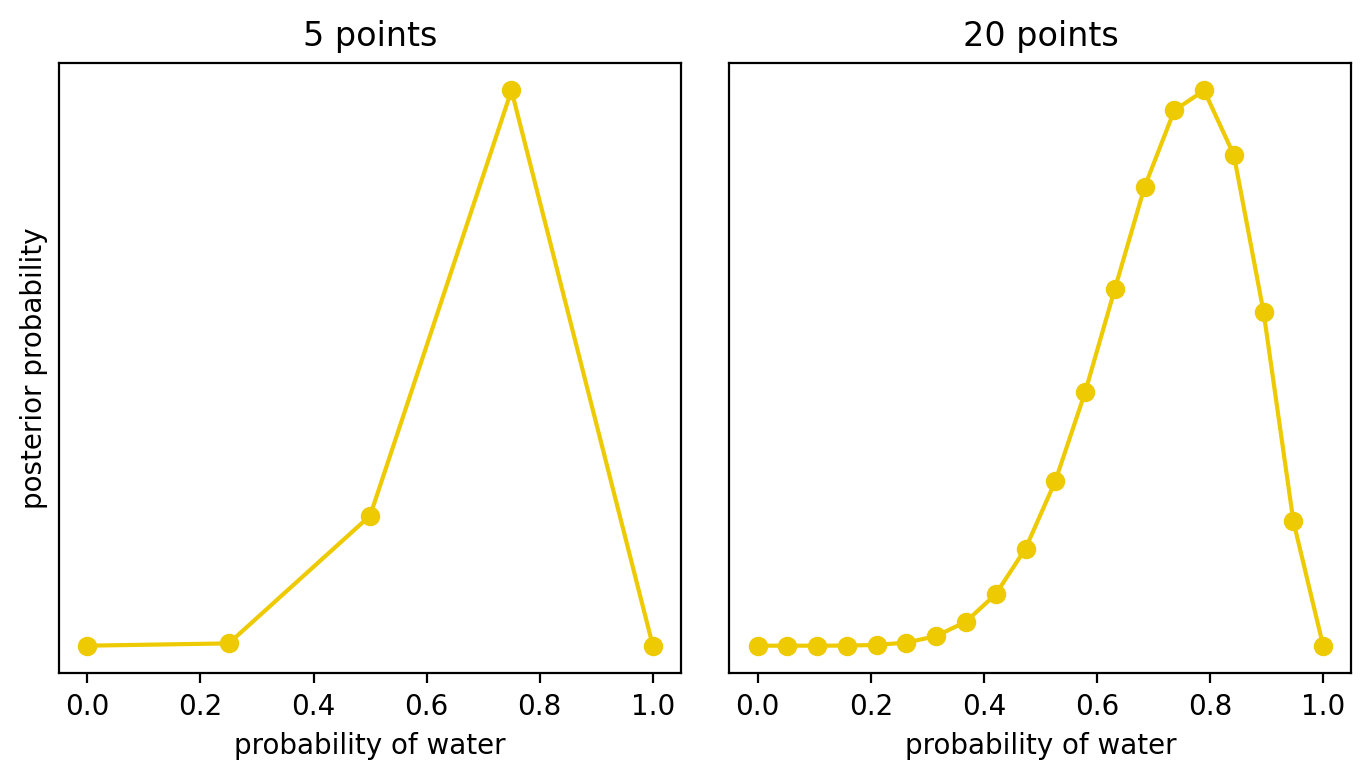

In [15]:
f3, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(7,4),tight_layout=True)
grid5=posterior_grid_approx()
grid20=posterior_grid_approx(20)
ax1.plot(grid5[0],grid5[1],marker='o',color=dark)
ax1.set_title('5 points')
ax1.set_xlabel('probability of water')
ax1.set_ylabel('posterior probability')
ax1.set_yticks([])
ax2.plot(grid20[0],grid20[1],marker='o',color=dark)
ax2.set_title('20 points')
ax2.set_xlabel('probability of water')
ax2.set_yticks([])
plt.show()


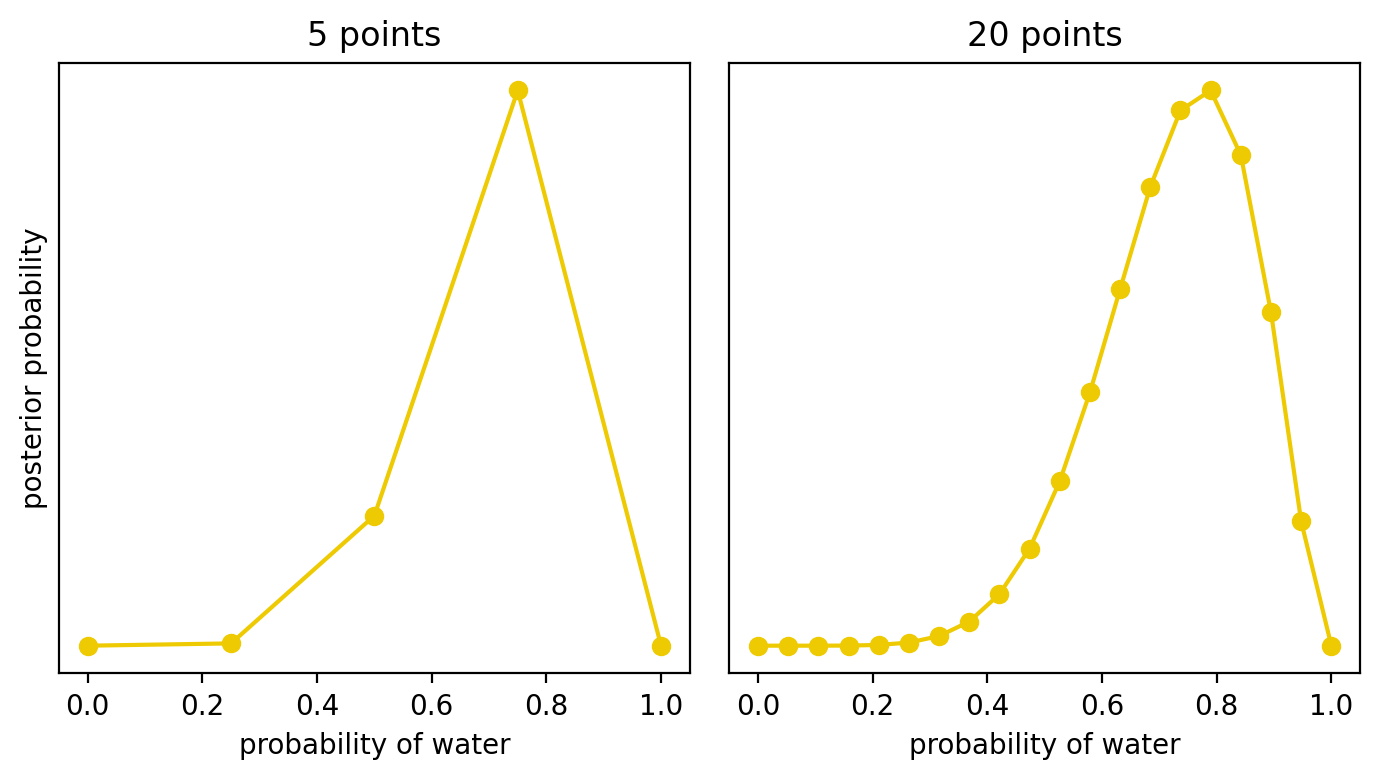

In [16]:
f3

## Summarizing by sampling
- The easiest way to get information about even complicated posteriors is to simulate data that correspond to it and get parameter estimates from sampling.
- For single parameter problems the easiest way is to use inverse cumulative distribution function 
- Grid approximation is more universal

In [17]:
def posterior_grid_approx(grid_points=5, success=7, tosses=11,prior_sel=1):
    
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    if prior_sel==1:
        prior = np.repeat(5, grid_points)  # uniform
    elif prior_sel==2:
        prior = (p_grid >= 0.5).astype(int)  # truncated
    elif prior_sel==3:    
        prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp 
    else:
        raise ValueError('Unsuported prior selection')
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

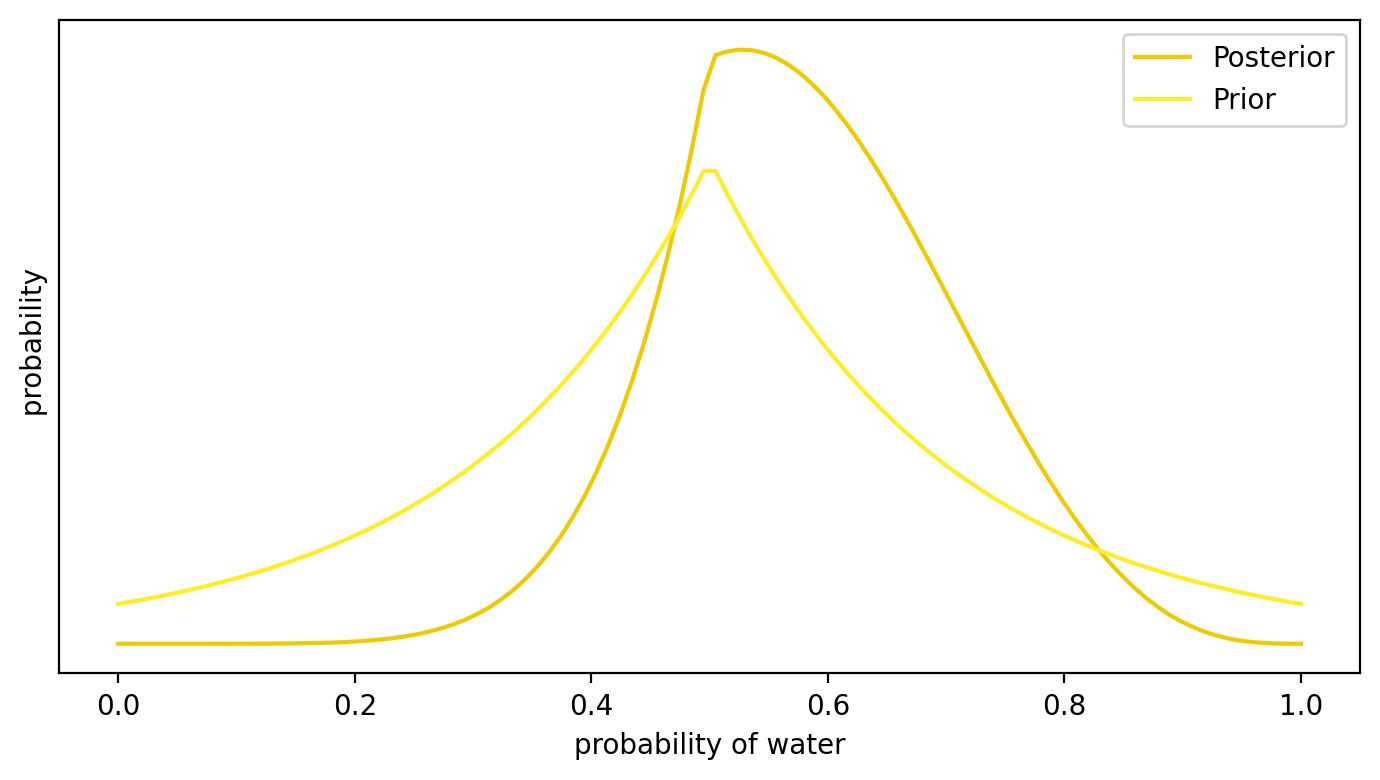

In [34]:

p_grid, posterior=posterior_grid_approx(100,6,9,prior_sel=3)
p_grid, prior=posterior_grid_approx(100,0,0,prior_sel=3)
fig,ax = plt.subplots(1, 1, figsize=(7,4),tight_layout=True)
ax.plot(p_grid, posterior,color=dark,label='Posterior')
ax.plot(p_grid, prior,color=mid,label='Prior')


ax.set_xlabel('probability of water')
ax.set_ylabel(' probability')
ax.set_yticks([])
ax.legend()
plt.show()

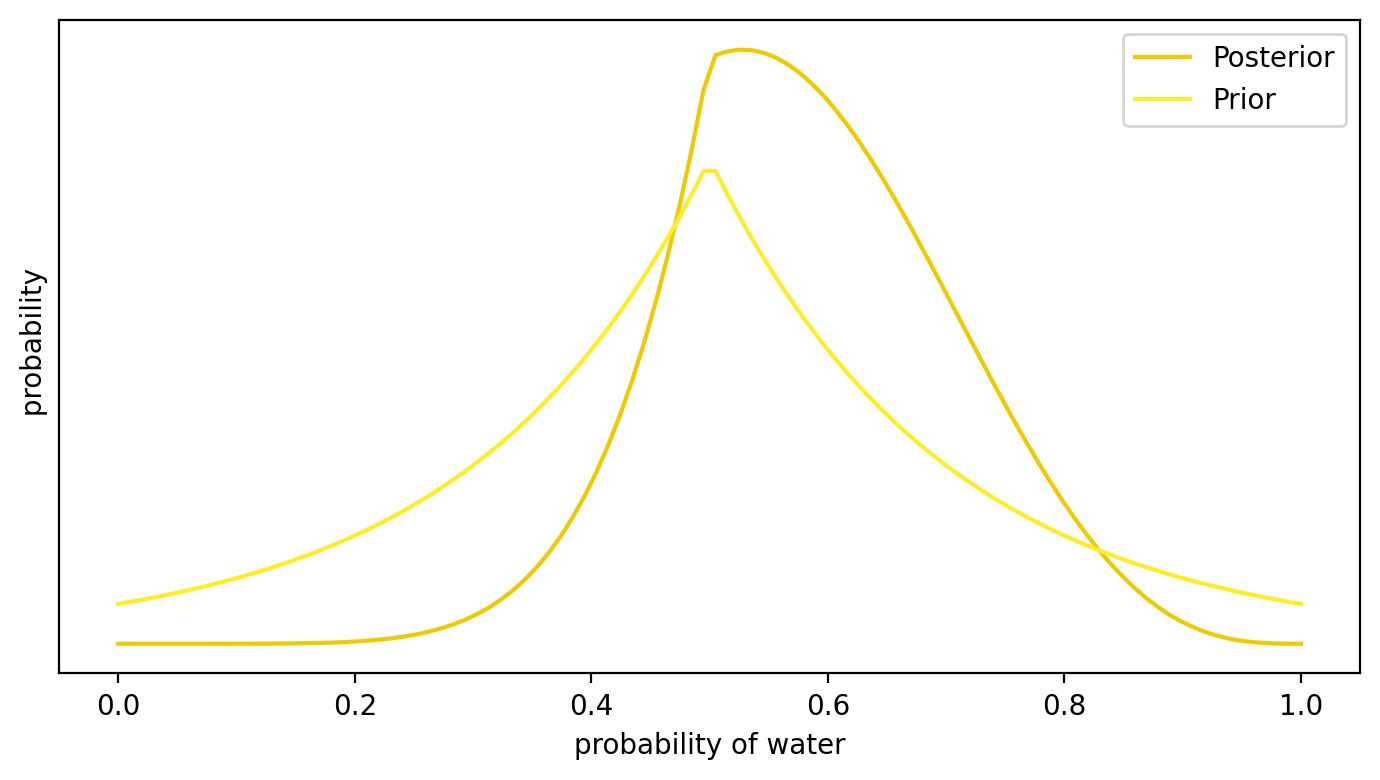

In [35]:
fig

## Sampling from grid posterior

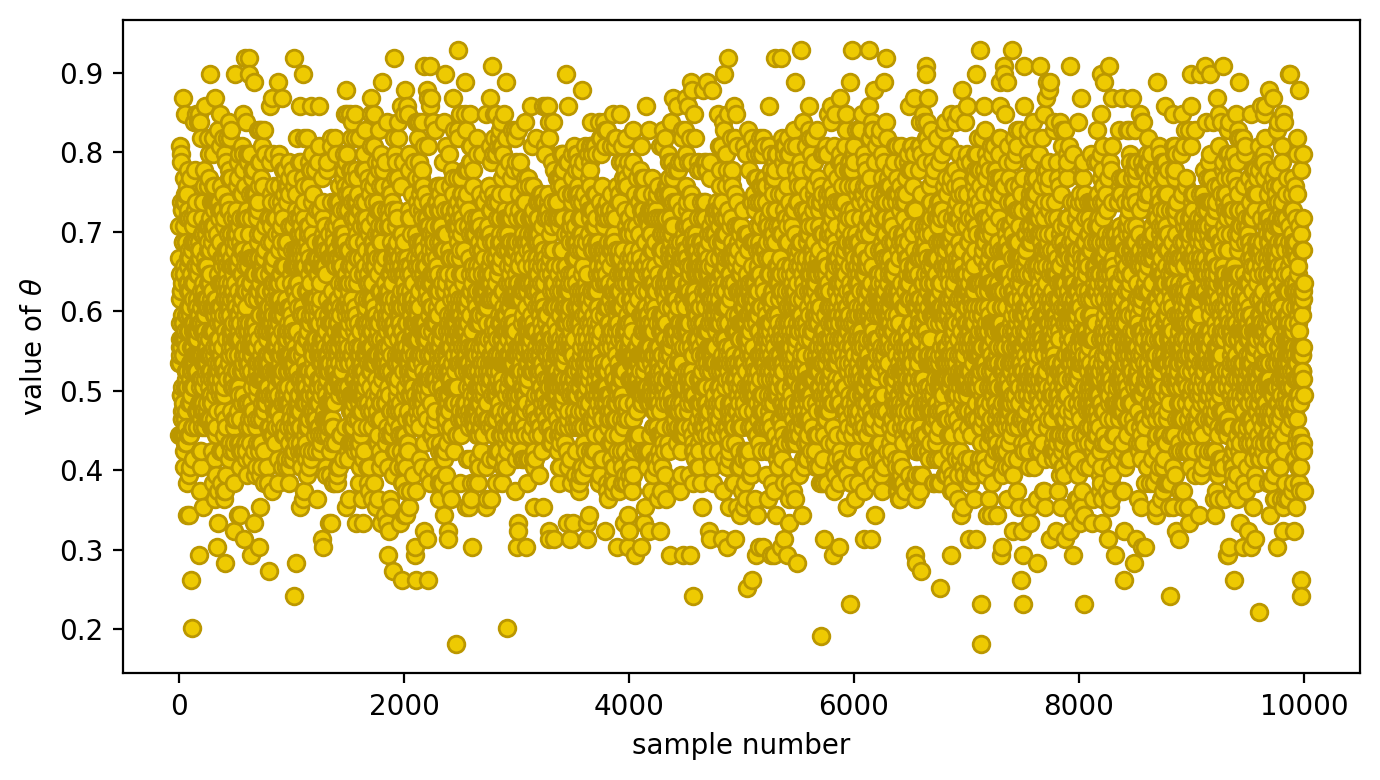

In [20]:
np.random.seed(44)
samples=np.random.choice(p_grid,size=10000,replace=True,p=posterior)

fig,ax = plt.subplots(1, 1, figsize=(7,4),tight_layout=True)
ax.scatter(range(10000),samples,color=dark,edgecolor=dark_highlight)
ax.set_xlabel('sample number')
ax.set_ylabel(r'value of $\theta$')
plt.show()


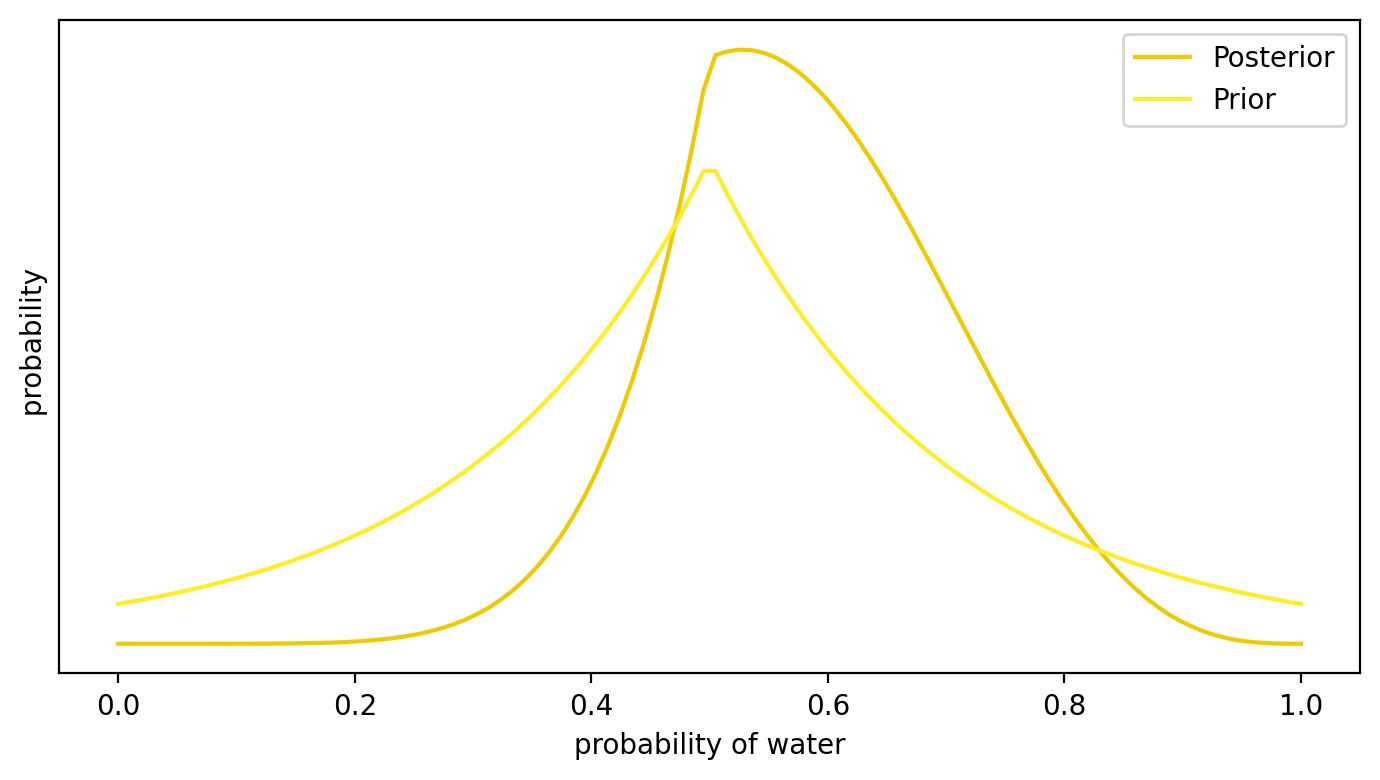

In [36]:
fig

## Histogram of samples

Text(0.5, 0, 'value of $\\theta$')

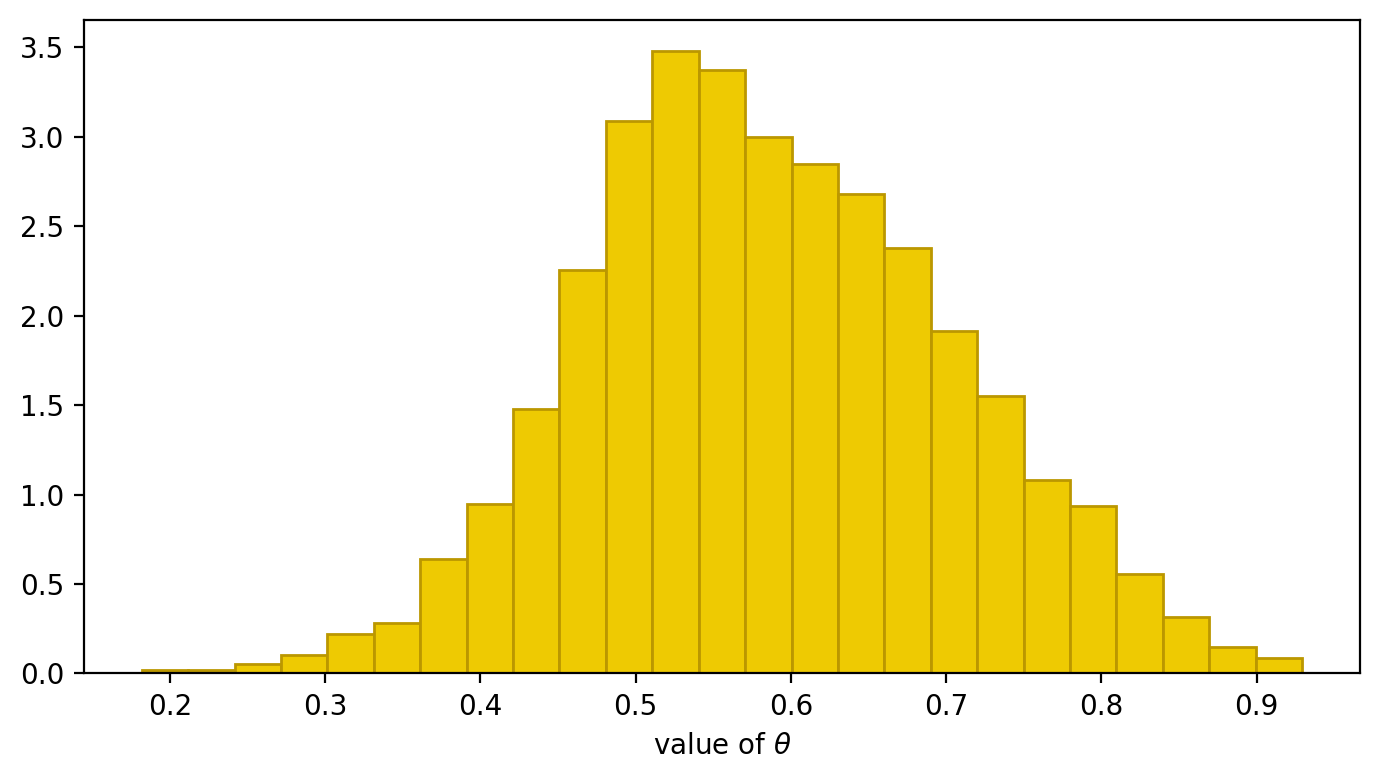

In [21]:
fig,ax = plt.subplots(1, 1, figsize=(7,4),tight_layout=True)
ax.hist(samples,bins=25,density=True,color=dark,edgecolor=dark_highlight)
ax.set_xlabel(r'value of $\theta$')


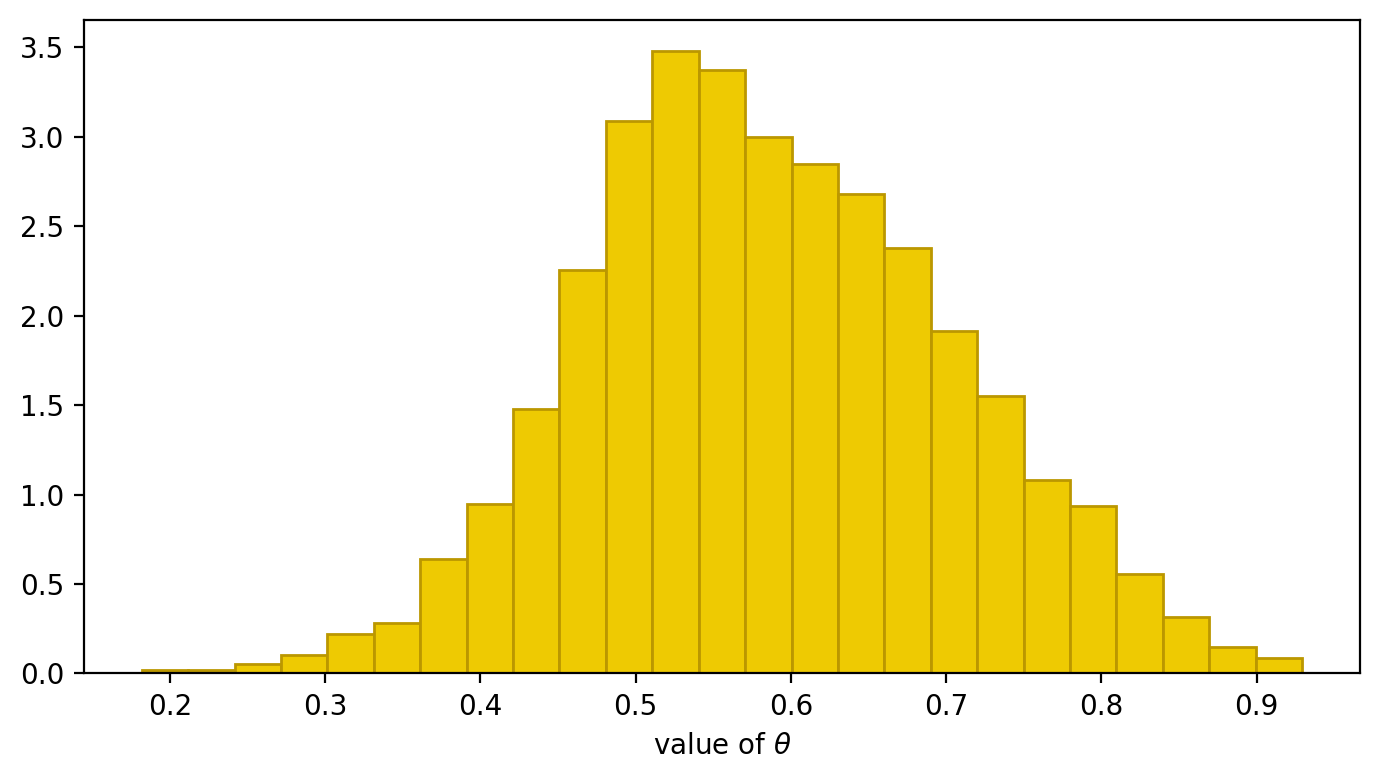

In [22]:
fig

## Computing statistics

In [23]:
# posterior probability where p < 0.5
print(np.sum( posterior[ p_grid < 0.5 ] ))

0.24107415057429232


In [24]:
# same by sampling
print(np.sum( samples < 0.5 ) / 1e4)

0.2371


In [25]:
# intervals of interest
print(np.sum( (samples > 0.5) & (samples < 0.75) ) / 1e4)

0.6694


In [26]:
# quantiles
np.quantile(samples, [0.1,0.9])

array([0.44444444, 0.74747475])

## Prior predictive distribution

In [27]:
pr_samples=np.random.choice(p_grid,size=10000,replace=True,p=prior)
pr_pr_d_samples=np.random.binomial(1,pr_samples)

print('Mean rate of success = {}'.format(np.sum(pr_pr_d_samples)/1e4))



Mean rate of success = 0.5017


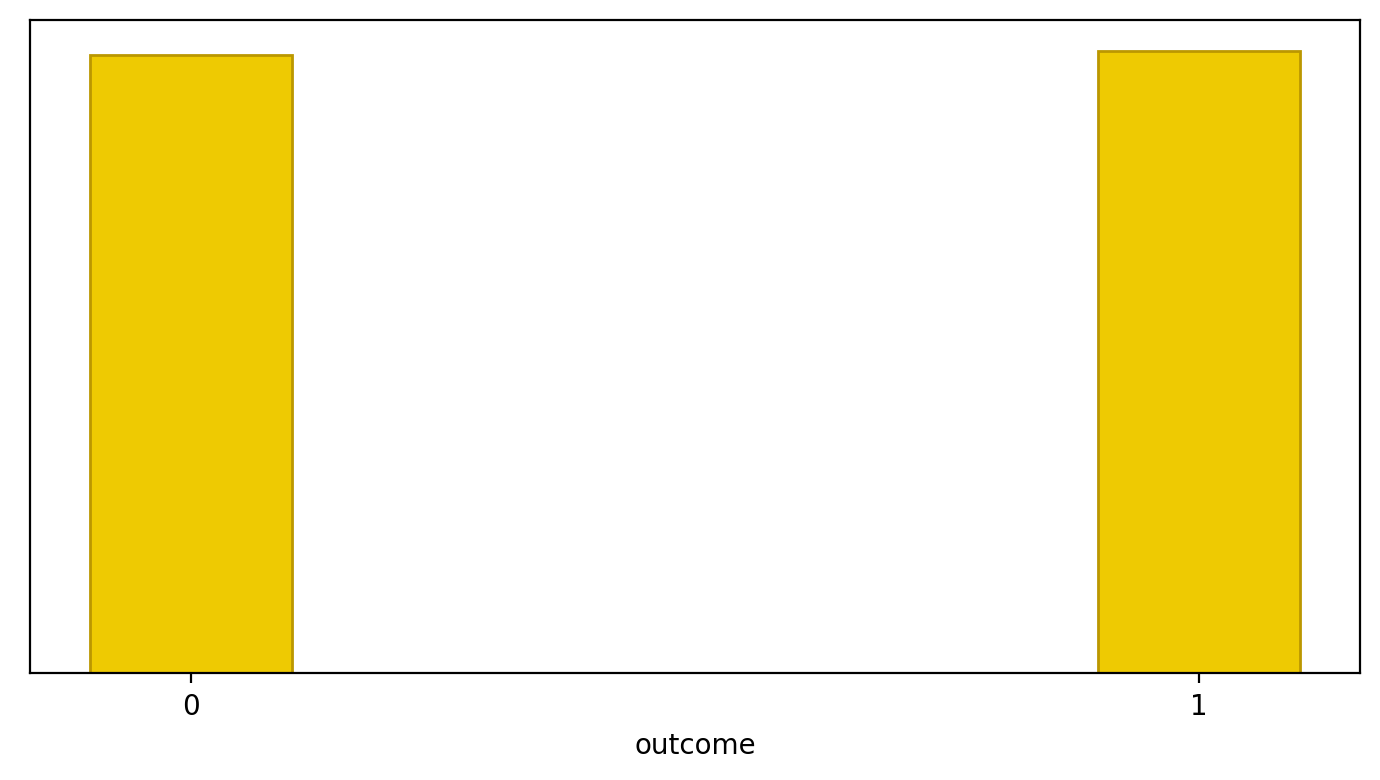

In [28]:
fig,ax = plt.subplots(1, 1, figsize=(7,4),tight_layout=True)
ax.hist(pr_pr_d_samples,bins=[-.1,.1,.9,1.1],density=True,color=dark,edgecolor=dark_highlight)
ax.set_xlabel('outcome')
ax.set_xticks([0,1])
ax.set_yticks([])
plt.show()

## Posterior predictive distribution

In [29]:
post_samples=np.random.choice(p_grid,size=10000,replace=True,p=posterior)
post_pr_d_samples=np.random.binomial(1,post_samples)
print('Mean rate of success = {}'.format(np.sum(post_pr_d_samples)/1e4))


Mean rate of success = 0.5813


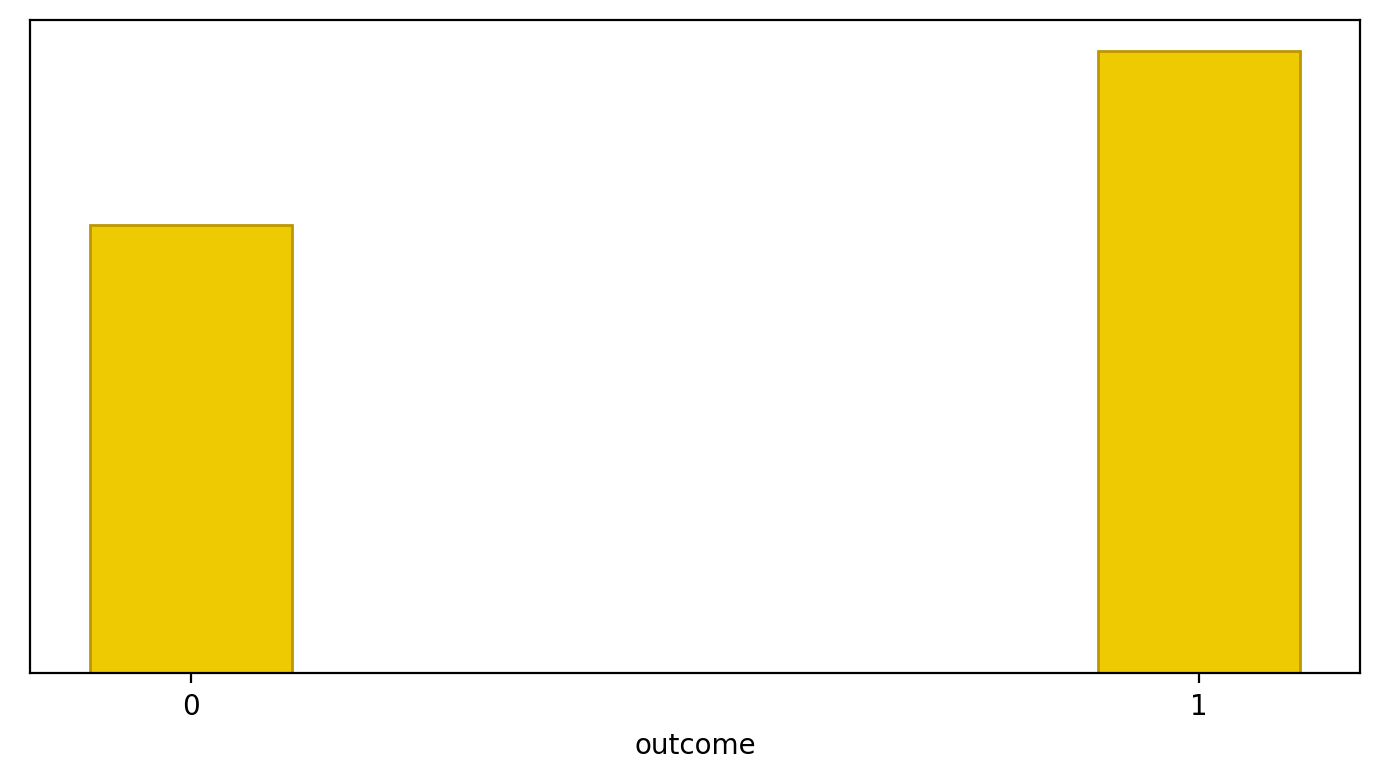

In [30]:
fig,ax = plt.subplots(1, 1, figsize=(7,4),tight_layout=True)
ax.hist(post_pr_d_samples,bins=[-.1,.1,.9,1.1],density=True,color=dark,edgecolor=dark_highlight)
ax.set_xlabel('outcome')
ax.set_xticks([0,1])
ax.set_yticks([])
plt.show()


In [31]:
post_pr_d_samples

array([1, 0, 1, ..., 0, 1, 1])

## Do grid approximations generalize?
It depends

<img src="img/grid_density.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Sometimes geometry is difficult

<img src="img/grid_negligible.png" alt="drawing" width="500"/>


<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## What contributes to expectation?
Expectation is an integral

$$
\mathbb{E}_{\pi}[f] = \int_{Q} \mathrm{d} q \, \pi(q) \, f(q).
$$

Intuitively, wherever distribution $\pi(q)$ is large, it should contribute the most, in particular next to maximum (mode).

<img src="img/conc_of_meas_anal_1.png" alt="drawing" width="400"/>


<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## But what about the volume?

$dq$ is also under the integral, and volume rises with dimension

<img src="img/box-1d.png" alt="drawing" width="150"/>
<img src="img/box-2d.png" alt="drawing" width="500"/>
<img src="img/box-3d.png" alt="drawing" width="700"/>
<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>

## Volume rises exponentially with dimension

<img src="img/conc_of_meas_anal_2.png" alt="drawing" width="400"/>


<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## It is the product that counts


<img src="img/conc_of_meas_anal_3.png" alt="drawing" width="400"/>


<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Typical set
What contributes the most to the expectation are the values from the typical set

<img src="img/conc_of_meas_anal_4.png" alt="drawing" width="400"/>


<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Concentration of measure

Typical set, is a "fuzzy surface" that is located progressively away from the mode with the rise of dimension.

<img src="img/typical_set.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Typical set is where we should sample from

<img src="img/typical_set_samples.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Computational algorithms for probabilistic computing

- Point estimators
- Laplace approximation
- Variational approximation
- Monte Carlo estimators
- Markov Chain Monte Carlo 

## Modal estimators 
This approach searches for the maximal value of probability distribution, in order to obtain approximation of expected value

<img src="img/good_mode.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Issues
- skewed distributions have maxima far from expectations
- problems with uncertainty quantisation

<img src="img/bad_mode.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Laplace estimator

Main idea is to find the maximal value, and fit a Gaussian distribution with a mean in it, and covariance obtained by second order Taylor approximation.

Expectation values can then estimated with Gaussian integrals,
$$
\mathbb{E}_{\pi} \! \left[ f \right]
\approx 
\int_{Q} \mathrm{d} q \, \mathcal{N} \! \left( q \mid \mu, \Sigma \right) \,
f \! \left( q \right),
$$

## If distribution is relatively close to Gaussian, typical set is well approximated

<img src="img/laplace.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Variational approximation

- The main idea is to approximate the posterior with functions, that can be easily sampled from (or their combination). 

- Such approximation is realized by minimization of a function called divergence, which measures how differetnt candidate and probability distribution are from one another.

- In practice it is done by minimizing certain bound on the divergence.

## Multimodality of variational approximation

It can happen, that significantly different candidates have similar divergences, that causes optimization problem to be multimodal



<img src="img/degenerate_fits.png" alt="drawing" width="1000"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Over and under fitting of the typical set

<img src="img/overestimated_var.png" alt="drawing" width="500"/>
<img src="img/underestimated_var.png" alt="drawing" width="500"/>
<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>

## Monte Carlo sampling

<img src="img/typical_set_samples.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Issues with Monte Carlo 

- It is easy to sample from known distributions, especially low dimensional or normal
- Complicated distributions are an issue
- Importance sampling is an option
    - Sample from something that you know (proposal distribution)
    - Correct with properly chosen weights
    - Strongly depends on quality of proposal

## Markov Chain Monte Carlo


<img src="img/typical_set_markov_chain.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Extra reading

[Probabilistic Computation by Michael Betancourt](https://betanalpha.github.io/assets/case_studies/probabilistic_computation.html#1_representation_with_computational_taxation)